In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [3]:
df = pd.read_csv('data/merged.csv')
df

,Unnamed: 0,Type_x,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,0,2,Nibble,3,Tabby,NaN,1,Black,White,NaN,...,1,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,1,2,No Name Yet,1,Domestic Medium Hair,NaN,1,Black,Brown,NaN,...,1,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,2,1,Brisco,1,Mixed Breed,NaN,1,Brown,White,NaN,...,1,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,3,1,Miko,4,Mixed Breed,NaN,2,Black,Brown,NaN,...,1,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,4,1,Hunter,1,Mixed Breed,NaN,1,Black,NaN,NaN,...,1,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,14988,2,NaN,2,Domestic Short Hair,NaN,3,Black,NaN,NaN,...,1,4,0,Selangor,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,14989,2,Serato & Eddie,60,Domestic Medium Hair,Domestic Long Hair,3,Black,Yellow,White,...,1,2,0,Selangor,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,14990,2,Monkies,2,Domestic Medium Hair,Domestic Short Hair,3,Cream,Gray,White,...,1,5,30,Selangor,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,14991,2,Ms Daym,9,Domestic Short Hair,NaN,2,Yellow,White,NaN,...,1,1,0,Johor,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


In [4]:
df['Type'] = df['Type_x']
df = df.drop(columns=['Unnamed: 0','Type_x'], axis=1)
dog_df = df[df['Type']==1]
cat_df = df[df['Type']==2]

In [42]:
numbers = [0,1,2]
dog_fast = dog_df[dog_df['AdoptionSpeed'].isin(numbers)]
dog_fast.head()

,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Type
3,Miko,4,Mixed Breed,NaN,2,Black,Brown,NaN,2,1,...,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1
4,Hunter,1,Mixed Breed,NaN,1,Black,NaN,NaN,2,1,...,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,1
10,Bear,2,Mixed Breed,NaN,1,Black,Brown,White,2,1,...,1,0,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,1
12,Peanut,2,Mixed Breed,NaN,1,Brown,Cream,Gray,2,3,...,1,0,Selangor,db784cbcf321e1d8856b312638b94113,0,Peanut was an abused puppy until he was rescue...,aaedd873d,1.0,2,1
14,Lost Dog,3,Mixed Breed,NaN,2,Brown,Cream,White,2,2,...,1,0,Kuala Lumpur,b609c40c6c840db208b149a19b856f86,0,"Lost Dog Found (Bandar Menjalara, Kepong／Taman...",c02be41e6,2.0,2,1


In [61]:
numbers = [0,1,2]
cat_fast = cat_df[cat_df['AdoptionSpeed'].isin(numbers)]
cat_fast.head()

,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Type
0,Nibble,3,Tabby,NaN,1,Black,White,NaN,1,1,...,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,2
1,No Name Yet,1,Domestic Medium Hair,NaN,1,Black,Brown,NaN,2,2,...,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,2
5,NaN,3,Domestic Short Hair,NaN,2,Cream,Gray,NaN,2,1,...,1,0,Selangor,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,2
6,BULAT,12,Domestic Long Hair,Domestic Long Hair,1,Black,NaN,NaN,2,3,...,1,300,Selangor,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,2
8,NaN,2,Domestic Medium Hair,NaN,2,Gray,NaN,NaN,2,2,...,1,0,Selangor,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,2


## Pre-Processing - Dog

In [5]:
Dog_Descriptions = dog_df['Description'].astype(str)

In [6]:
lemmatizer  = WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words('english'))
punct = string.punctuation

dog_descriptions_processed = []

for description in Dog_Descriptions:
    result = ""
    for sent in nltk.sent_tokenize(description):
        for word in nltk.word_tokenize(sent):
            word = word.lower()
            word = lemmatizer.lemmatize(word)
            if word not in stopwords and word not in punct:
                result = result + " " + word
    dog_descriptions_processed.append(result)

## Pre-Processing - Cat

In [7]:
Cat_Descriptions = cat_df['Description'].astype(str)

In [8]:
lemmatizer  = WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words('english'))
punct = string.punctuation

cat_descriptions_processed = []

for description in Cat_Descriptions:
    result = ""
    for sent in nltk.sent_tokenize(description):
        for word in nltk.word_tokenize(sent):
            word = word.lower()
            word = lemmatizer.lemmatize(word)
            if word not in stopwords and word not in punct:
                result = result + " " + word
    cat_descriptions_processed.append(result)

## Dog - Vectorization and Wordcloud

In [9]:
#We will take the tokenized words we collected earlier, and join them back together into a long document

desc_words_text = " ".join(dog_descriptions_processed)
desc_words_text = desc_words_text.replace('wa','')
desc_words_text = desc_words_text.replace('ha','')

In [10]:
#Create TfidfVectorizer object with parameters, and use it to fit and transform the document

vectorizer = TfidfVectorizer(stop_words='english', max_features=200)
dt_matrix = vectorizer.fit_transform([desc_words_text])

In [11]:
#Inspect Weights

weights = dt_matrix.toarray()
weights

array([[0.04217461, 0.02855252, 0.07657616, 0.1506126 , 0.05641238,
        0.11659586, 0.02254956, 0.18285924, 0.05564278, 0.03101527,
        0.02408878, 0.02539712, 0.02101034, 0.02339613, 0.01708533,
        0.04571481, 0.03032262, 0.01608484, 0.02724418, 0.02285741,
        0.02632065, 0.02662849, 0.01508435, 0.02501231, 0.02578192,
        0.03878832, 0.02231868, 0.0382496 , 0.05040943, 0.02647457,
        0.01539219, 0.03163096, 0.02408878, 0.01993289, 0.03340106,
        0.03070742, 0.09543159, 0.01877847, 0.01508435, 0.01962505,
        0.01977897, 0.03678734, 0.01731622, 0.02262652, 0.02816771,
        0.03116919, 0.03640253, 0.13999199, 0.0238579 , 0.04379079,
        0.0733438 , 0.05818249, 0.03032262, 0.03178488, 0.46684519,
        0.02593584, 0.0252432 , 0.0895056 , 0.04617658, 0.08265607,
        0.04910109, 0.05725896, 0.02278044, 0.02824467, 0.04440647,
        0.09527767, 0.02401182, 0.02124123, 0.02185691, 0.04371383,
        0.02516623, 0.01570004, 0.18593768, 0.02

In [12]:
#Inspect features

features = vectorizer.get_feature_names()
features

['abandoned',
 'able',
 'active',
 'adopt',
 'adopted',
 'adopter',
 'adopting',
 'adoption',
 'adorable',
 'age',
 'ago',
 'alert',
 'alys',
 'animal',
 'apartment',
 'area',
 'attention',
 'available',
 'ay',
 'baby',
 'bark',
 'beautiful',
 'best',
 'big',
 'birth',
 'black',
 'born',
 'boy',
 'breed',
 'bring',
 'brother',
 'brown',
 'ca',
 'cage',
 'caging',
 'car',
 'care',
 'cat',
 'check',
 'child',
 'cnce',
 'come',
 'command',
 'commitment',
 'companion',
 'compulsory',
 'condition',
 'contact',
 'cost',
 'currently',
 'cute',
 'day',
 'dewormed',
 'doe',
 'dog',
 'email',
 'eye',
 'family',
 'fee',
 'female',
 'food',
 'forever',
 'foster',
 'free',
 'friend',
 'friendly',
 'fur',
 'gave',
 'gentle',
 'girl',
 'given',
 'going',
 'good',
 'got',
 'great',
 'guard',
 'health',
 'healthy',
 'heart',
 'help',
 'hi',
 'home',
 'hope',
 'hour',
 'house',
 'human',
 'intelligent',
 'interested',
 'iting',
 'kid',
 'kind',
 'kindly',
 'klang',
 'know',
 'left',
 'leg',
 'let',
 'li

In [13]:
#Add features and weights to a dictionary

tfidf_dist = dict(zip(features, weights[0]))
tfidf_dist

{'abandoned': 0.0421746067851018,
 'able': 0.028552516637359065,
 'active': 0.07657615648024871,
 'adopt': 0.1506126012380369,
 'adopted': 0.05641238462313799,
 'adopter': 0.1165958563493234,
 'adopting': 0.022549561656997858,
 'adoption': 0.1828592440171567,
 'adorable': 0.05564277501027117,
 'age': 0.031015267398532893,
 'ago': 0.024088780882731503,
 'alert': 0.0253971172246051,
 'alys': 0.021010342431264217,
 'animal': 0.023396132231151362,
 'apartment': 0.01708533340564343,
 'area': 0.045714811004289174,
 'attention': 0.030322618746952752,
 'available': 0.016084840908916563,
 'ay': 0.02724418029548547,
 'baby': 0.022857405502144587,
 'bark': 0.026320648760045282,
 'beautiful': 0.02662849260519201,
 'best': 0.015084348412189695,
 'big': 0.025012312418171687,
 'birth': 0.025781922031038507,
 'black': 0.038788324488487784,
 'born': 0.022318678773137812,
 'boy': 0.03824959775948101,
 'breed': 0.05040942964277678,
 'bring': 0.02647457068261865,
 'brother': 0.015392192257336422,
 'brown'

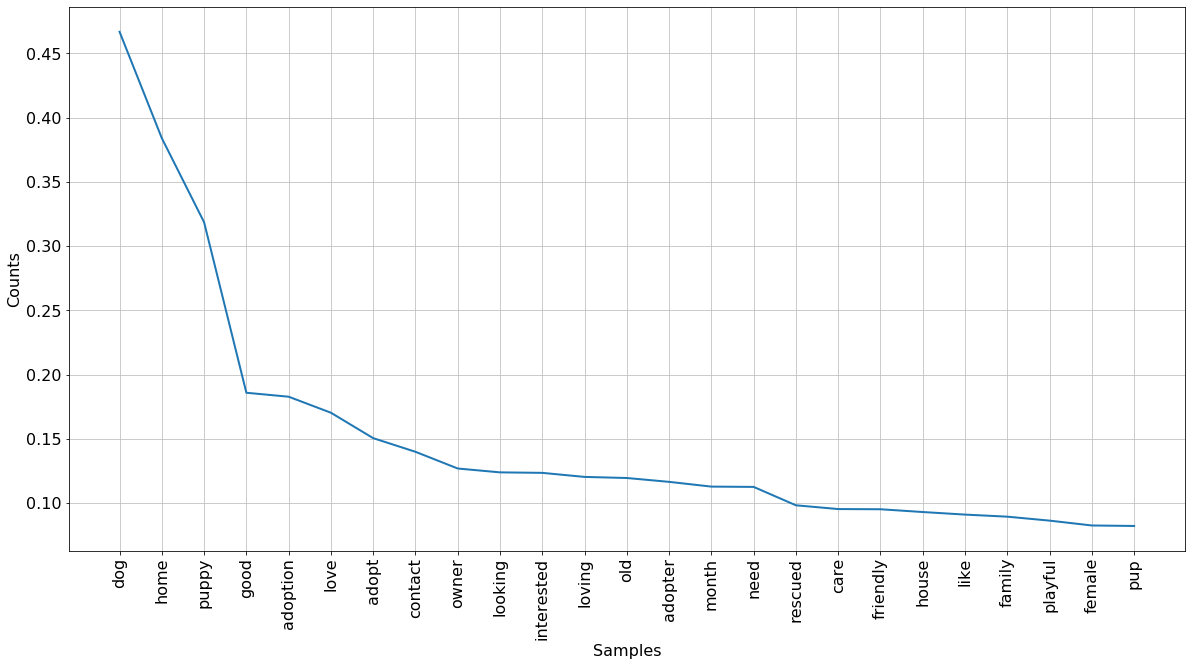

In [14]:
# Print Frequency Distribution

plt.figure(figsize=(20, 10))
plt.rc('font', size=16)
fdist = nltk.FreqDist(tfidf_dist)
fdist.plot(25)

In [15]:
import numpy as np
from PIL import Image

# Create mask from image
dog_mask = np.array(Image.open("dog.png"))

In [16]:
from wordcloud import STOPWORDS

# Create stopwords set and add a few words to filter out
stopwords = set(STOPWORDS)
stopwords.add("wa")
stopwords.add("ha")
stopwords.add("pls")
stopwords.add("tnk")
stopwords.add("tnks")
stopwords.add("2014")
stopwords.add("2013")
stopwords.add("2012")
stopwords.add("2011")
stopwords.add("2010")
stopwords.add("including")

In [17]:
wc = WordCloud(background_color="white", max_words=2000, mask=dog_mask,
               stopwords=stopwords, contour_width=1, contour_color='black')

In [18]:
# Generate wordcloud
wc.generate_from_frequencies(fdist)

(-0.5, 1416.5, 1271.5, -0.5)

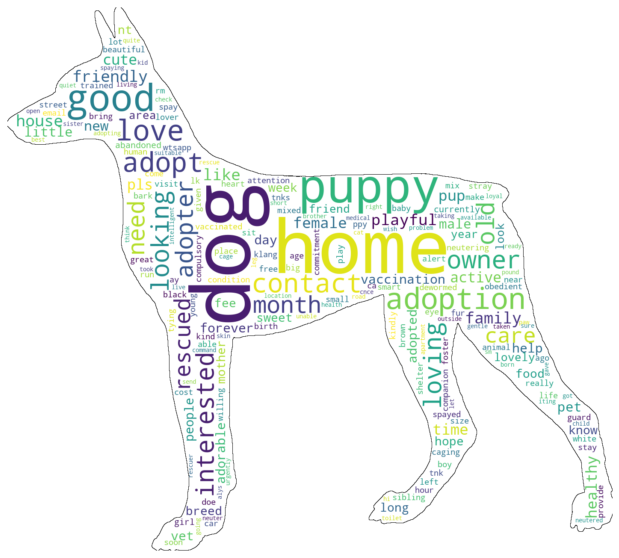

In [19]:
# Plot wordcloud
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(wc, interpolation='bilinear')
plt.axis("off")

## Cat - Vectorization and Wordcloud

In [20]:
#We will take the tokenized words we collected earlier, and join them back together into a long document

desc_words_text = " ".join(cat_descriptions_processed)
desc_words_text = desc_words_text.replace('wa','was')
desc_words_text = desc_words_text.replace('ha','has')

In [21]:
#Create TfidfVectorizer object with parameters, and use it to fit and transform the document

vectorizer = TfidfVectorizer(stop_words='english', max_features=200)
dt_matrix = vectorizer.fit_transform([desc_words_text])

In [22]:
#Inspect Weights

weights = dt_matrix.toarray()
weights

array([[0.02108533, 0.03051372, 0.09908389, 0.01662827, 0.11879781,
        0.05674181, 0.09882675, 0.14871155, 0.04859911, 0.02477097,
        0.03659933, 0.02588524, 0.02982802, 0.01765682, 0.0209139 ,
        0.03411366, 0.03017087, 0.02879947, 0.03891357, 0.03462793,
        0.01637113, 0.02031391, 0.03128514, 0.01919965, 0.04954195,
        0.02605666, 0.01774253, 0.02597095, 0.04345634, 0.03068515,
        0.01817109, 0.02811377, 0.01791396, 0.01799967, 0.0161997 ,
        0.02614238, 0.0242567 , 0.02665665, 0.10714089, 0.51290485,
        0.01782824, 0.03145656, 0.02502811, 0.08485558, 0.02039962,
        0.02931375, 0.08194135, 0.0458563 , 0.0371136 , 0.03899928,
        0.02759949, 0.03985641, 0.02597095, 0.02862804, 0.01774253,
        0.03917071, 0.02974231, 0.05794179, 0.05657039, 0.04825625,
        0.02477097, 0.02314243, 0.02074248, 0.06848445, 0.01928536,
        0.1139979 , 0.03137085, 0.01757111, 0.04174209, 0.03488507,
        0.06985586, 0.02039962, 0.03617076, 0.02

In [23]:
#Inspect features

features = vectorizer.get_feature_names()
features

['abandoned',
 'able',
 'active',
 'ada',
 'adopt',
 'adopted',
 'adopter',
 'adoption',
 'adorable',
 'affectionate',
 'age',
 'ago',
 'alys',
 'animal',
 'apartment',
 'area',
 'attention',
 'ay',
 'baby',
 'beautiful',
 'better',
 'big',
 'birth',
 'bit',
 'black',
 'blue',
 'boleh',
 'born',
 'box',
 'boy',
 'breed',
 'bring',
 'brother',
 'brought',
 'brown',
 'ca',
 'cage',
 'car',
 'care',
 'cat',
 'clean',
 'come',
 'condition',
 'contact',
 'cuddle',
 'currently',
 'cute',
 'dan',
 'day',
 'dewormed',
 'di',
 'dia',
 'doe',
 'dog',
 'domestic',
 'eat',
 'email',
 'eye',
 'family',
 'fee',
 'feed',
 'feeding',
 'feel',
 'female',
 'flea',
 'food',
 'forever',
 'foster',
 'free',
 'friend',
 'friendly',
 'fully',
 'fur',
 'gave',
 'gentle',
 'girl',
 'given',
 'good',
 'got',
 'great',
 'grey',
 'health',
 'healthy',
 'help',
 'hi',
 'home',
 'hope',
 'house',
 'human',
 'indoor',
 'indoors',
 'interested',
 'ir',
 'kept',
 'kibble',
 'kind',
 'kitten',
 'kitty',
 'know',
 'kuci

In [24]:
#Add features and weights to a dictionary

tfidf_dist = dict(zip(features, weights[0]))
tfidf_dist

{'abandoned': 0.02108532631927927,
 'able': 0.03051372426692447,
 'active': 0.09908389115888958,
 'ada': 0.01662826547130154,
 'adopt': 0.11879781414032954,
 'adopted': 0.05674181310310113,
 'adopter': 0.09882675303304471,
 'adoption': 0.1487115494469493,
 'adorable': 0.04859910578468027,
 'affectionate': 0.024770972789722394,
 'age': 0.036599326578586375,
 'ago': 0.025885238001716826,
 'alys': 0.029828022598004822,
 'animal': 0.017656817974681015,
 'apartment': 0.020913900902049358,
 'area': 0.03411365802875264,
 'attention': 0.030170873432464645,
 'ay': 0.028799470094625343,
 'baby': 0.0389135697111902,
 'beautiful': 0.03462793428044238,
 'better': 0.01637112734545667,
 'big': 0.020313911941744662,
 'birth': 0.03128513864445908,
 'bit': 0.01919964672975023,
 'black': 0.04954194557944479,
 'blue': 0.02605666341894674,
 'boleh': 0.01774253068329597,
 'born': 0.025970950710331783,
 'box': 0.04345634326778289,
 'boy': 0.030685149684154384,
 'breed': 0.018171094226370754,
 'bring': 0.0281

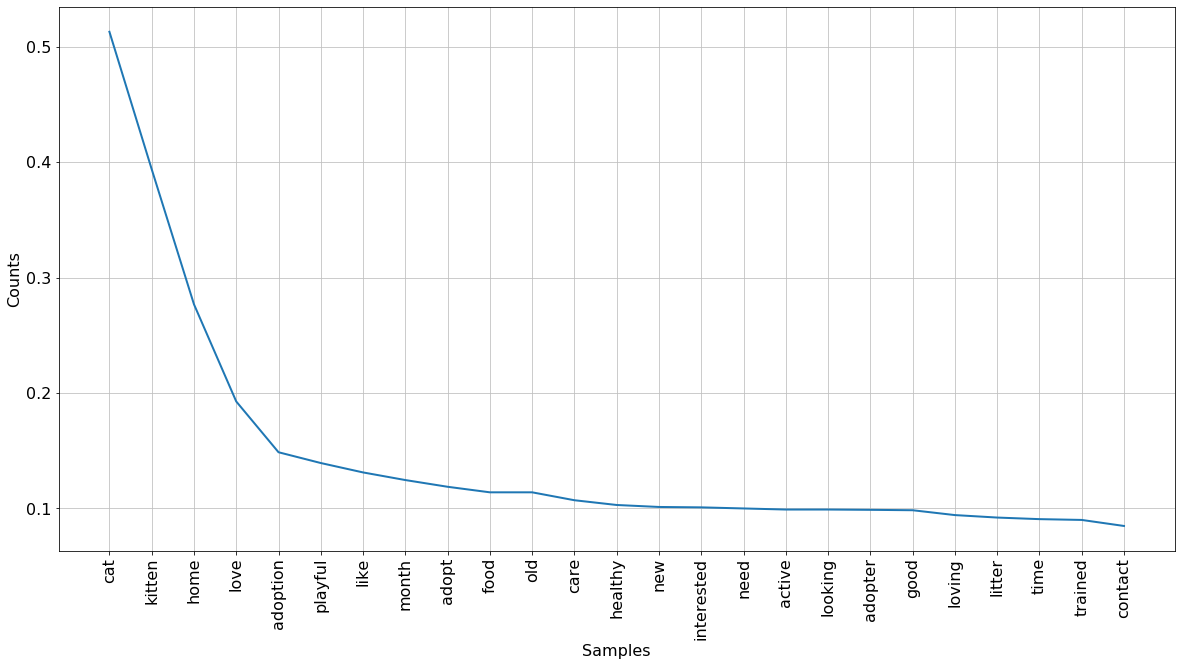

In [25]:
# Print Frequency Distribution

plt.figure(figsize=(20, 10))
plt.rc('font', size=16)
fdist = nltk.FreqDist(tfidf_dist)
fdist.plot(25)

In [26]:
import numpy as np
from PIL import Image

# Create mask from image
cat_mask = np.array(Image.open("cat.png"))

In [27]:
from wordcloud import STOPWORDS

# Create stopwords set and add a few words to filter out
stopwords = set(STOPWORDS)
stopwords.add("wa")
stopwords.add("ha")
stopwords.add("pls")
stopwords.add("tnk")
stopwords.add("tnks")
stopwords.add("2014")
stopwords.add("2013")
stopwords.add("2012")
stopwords.add("2011")
stopwords.add("2010")
stopwords.add("including")

In [28]:
wc = WordCloud(background_color="white", max_words=2000, mask=cat_mask,
               stopwords=stopwords, contour_width=1, contour_color='black')

In [29]:
# Generate wordcloud
wc.generate_from_frequencies(fdist)

(-0.5, 899.5, 1267.5, -0.5)

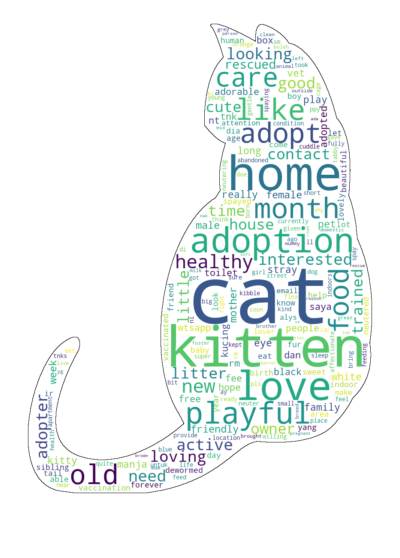

In [30]:
# Plot wordcloud
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(wc, interpolation='bilinear')
plt.axis("off")

## Topic Modeling - Dog Description

In [31]:
from sklearn.feature_extraction.text import CountVectorizer


In [32]:
dog_tm = dog_df['Description'].dropna()
data = dog_tm.to_numpy()

In [33]:
# Pre-processing with Count Vectorizer

vectorizer = CountVectorizer(min_df=20, max_df=0.8, 
                             stop_words='english', lowercase=True)

data_vectorized = vectorizer.fit_transform(data)

In [34]:
from sklearn.decomposition import LatentDirichletAllocation
# Build a Latent Dirichlet Allocation Model

lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_Z = lda_model.fit_transform(data_vectorized)

In [35]:
lda_model.score(data_vectorized)

-1220676.4062925407

In [36]:
lda_model.perplexity(data_vectorized)

588.3879091653621

In [37]:
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [10, 15]}

# Init the Model
lda = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

KeyboardInterrupt: 

In [ ]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood / Coherence Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

In [ ]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne', sort_topics=False)
panel

## Ngram Ranking
### Source: https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460

### Dogs: Pre-processing

In [52]:
Dog_Descriptions = dog_fast['Description'].astype(str)

In [53]:
ADDITIONAL_STOPWORDS = ['--']

In [54]:
lemmatizer  = WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words('english')+ ADDITIONAL_STOPWORDS) 
punct = string.punctuation

dog_descriptions_wordtok = []

for description in Dog_Descriptions:
    #result = ""
    for sent in nltk.sent_tokenize(description):
        for word in nltk.word_tokenize(sent):
            word = word.lower()
            word = lemmatizer.lemmatize(word)
            #word = word.replace('wa','was')
            if word not in stopwords and word not in punct:
                #result = result + " " + word
                dog_descriptions_wordtok.append(word)
    #dog_descriptions_wordtok.append(word)


In [55]:
dog_descriptions_wordtok = [item.replace('wa','was') for item in dog_descriptions_wordtok]
dog_descriptions_wordtok = [item.replace('pls','please') for item in dog_descriptions_wordtok]
dog_descriptions_wordtok = [item.replace('plz','please') for item in dog_descriptions_wordtok]

In [56]:
(pd.Series(nltk.ngrams(dog_descriptions_wordtok, 2)).value_counts())[:10]

(please, contact)      468
(please, call)         441
(month, old)           337
(good, home)           325
(loving, home)         293
(interested, adopt)    246
(adopt, please)        227
(forever, home)        217
(take, care)           214
(was, found)           180
dtype: int64

In [57]:
(pd.Series(nltk.ngrams(dog_descriptions_wordtok, 3)).value_counts())[:10]

(interested, adopt, please)       151
(adopt, please, contact)          119
(commitment, spay, compulsory)    105
(2, month, old)                    82
(looking, good, home)              79
(looking, forever, home)           73
(long, hour, except)               71
(adopt, please, call)              69
(adopter, please, call)            68
(find, good, home)                 68
dtype: int64

In [58]:
bigrams_series = (pd.Series(nltk.ngrams(dog_descriptions_wordtok, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(dog_descriptions_wordtok, 3)).value_counts())[:12]

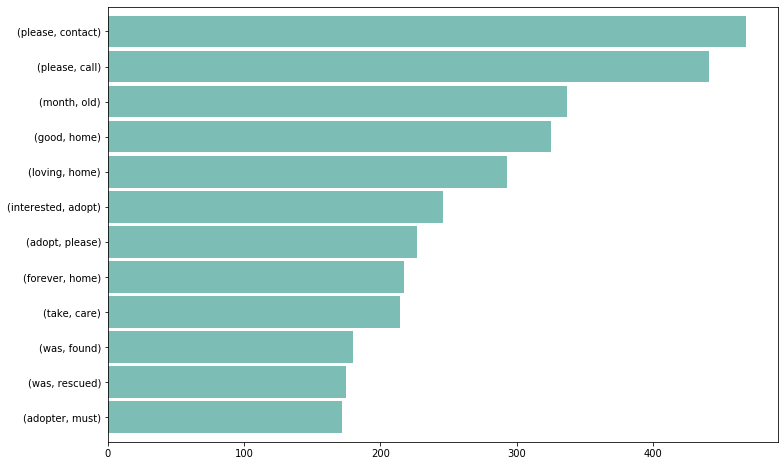

In [59]:
bigrams_series.sort_values().plot.barh(color='#7cbdb5', width=.9, figsize=(12, 8))

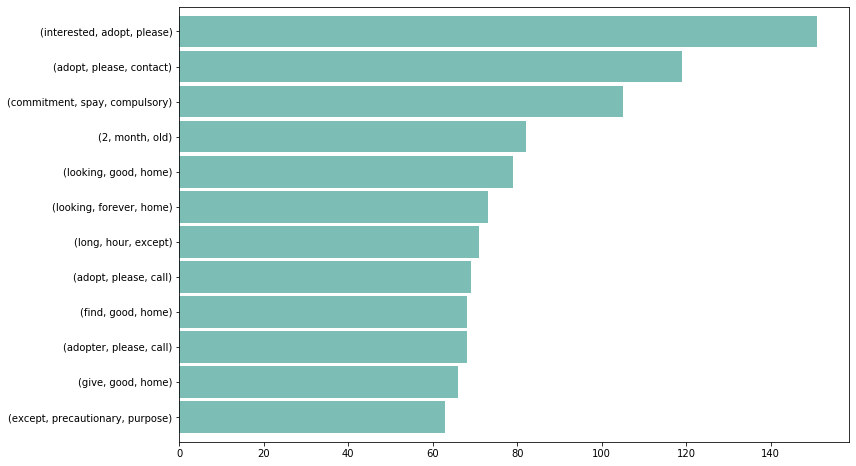

In [60]:
trigrams_series.sort_values().plot.barh(color='#7cbdb5', width=.9, figsize=(12, 8))

### Cats: Pre-processing

In [62]:
Cat_Descriptions = cat_fast['Description'].astype(str)

In [63]:
ADDITIONAL_STOPWORDS = ['--','...']

In [64]:
lemmatizer  = WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words('english')+ ADDITIONAL_STOPWORDS) 
punct = string.punctuation

cat_descriptions_wordtok = []

for description in Cat_Descriptions:
    for sent in nltk.sent_tokenize(description):
        for word in nltk.word_tokenize(sent):
            word = word.lower()
            word = lemmatizer.lemmatize(word)
            if word not in stopwords and word not in punct:
                cat_descriptions_wordtok.append(word)

In [65]:
#cat_descriptions_wordtok = [item.replace('wass','was') for item in cat_descriptions_wordtok]
cat_descriptions_wordtok = [item.replace('wa','was') for item in cat_descriptions_wordtok]
cat_descriptions_wordtok = [item.replace('pls','please') for item in cat_descriptions_wordtok]
cat_descriptions_wordtok = [item.replace('plz','please') for item in cat_descriptions_wordtok]

In [66]:
(pd.Series(nltk.ngrams(cat_descriptions_wordtok, 2)).value_counts())[:15]

(month, old)            412
(please, contact)       257
(please, call)          252
(new, home)             249
(take, care)            241
(adoption, fee)         233
(loving, home)          220
(interested, please)    209
(week, old)             173
(stray, cat)            170
(ca, n't)               167
(was, found)            165
(active, playful)       165
(toilet, trained)       164
(litter, box)           164
dtype: int64

In [67]:
(pd.Series(nltk.ngrams(cat_descriptions_wordtok, 3)).value_counts())[:15]

(interested, please, call)       103
(2, month, old)                  101
(anyone, interested, please)      92
(looking, new, home)              87
(kitten, looking, new)            64
(must, kept, indoors)             61
(stray, cat, *another)            58
(refundable, surgery, done)       58
(cat, *another, rm)               58
(neutering, spaying, deposit)     58
(cat, charity, club)              58
(done, anyone, interested)        58
(rescuing, stray, cat)            58
(would, fully, refundable)        58
(surgery, done, anyone)           58
dtype: int64

In [68]:
bigrams_series = (pd.Series(nltk.ngrams(cat_descriptions_wordtok, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(cat_descriptions_wordtok, 3)).value_counts())[:12]

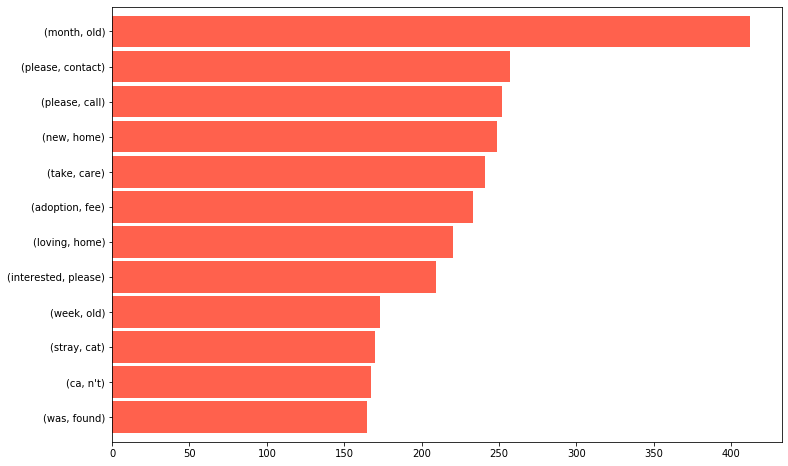

In [69]:
bigrams_series.sort_values().plot.barh(color='#ff614d', width=.9, figsize=(12, 8))

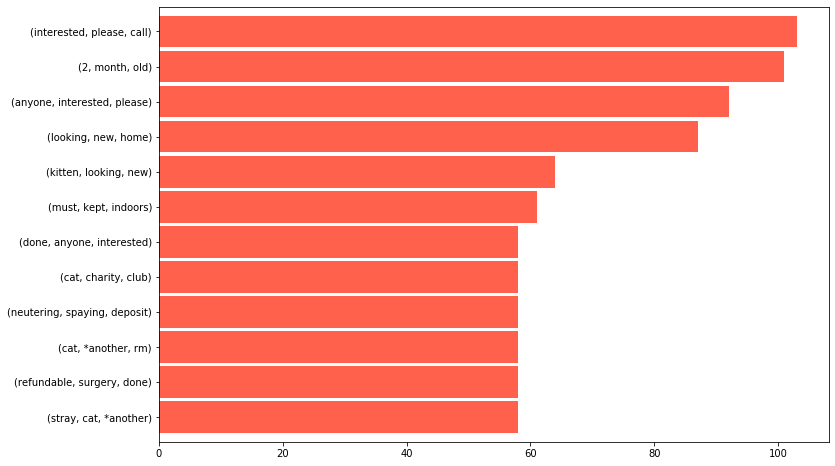

In [70]:
trigrams_series.sort_values().plot.barh(color='#ff614d', width=.9, figsize=(12, 8))